In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [4]:
# Load the dataset
file_path = "/content/drive/MyDrive/Machine Learning/machine learning/datasets/computer_science_student_career_datasetMar62024.csv"
df = pd.read_csv(file_path)

In [6]:
# -------------------- Dataset Overview --------------------
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()

Dataset Shape: (8000, 28)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Python                           8000 non-null   int64  
 1   Java                             8000 non-null   int64  
 2   C++                              8000 non-null   int64  
 3   JavaScript                       8000 non-null   int64  
 4   C#                               8000 non-null   int64  
 5   PHP                              8000 non-null   int64  
 6   Ruby                             8000 non-null   int64  
 7   Swift                            8000 non-null   int64  
 8   Go                               8000 non-null   int64  
 9   Rust                             8000 non-null   int64  
 10  Others                           8000 non-null   int64  
 11  Software_Development_Experience  8000 non-

In [7]:
print("Dataset Description:")
print(df.describe())

Dataset Description:
            Python         Java          C++   JavaScript           C#  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean      4.495875     4.515125     4.523375     4.467000     4.501625   
std       2.850745     2.852462     2.885047     2.852749     2.891893   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       4.000000     4.000000     5.000000     4.000000     4.000000   
75%       7.000000     7.000000     7.000000     7.000000     7.000000   
max       9.000000     9.000000     9.000000     9.000000     9.000000   

               PHP         Ruby        Swift           Go         Rust  ...  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000  ...   
mean      4.488750     4.487500     4.494625     4.520375     4.453625  ...   
std       2.887458     2.899292     2.864349     2.874912     2.855148  ...

In [8]:
# -------------------- Data Visualization --------------------
categorical_columns = ['Coursework_Completion_Status', 'Internship_Experience',
                       'Certifications_Training', 'Leadership_Experience', 'Academic_Achievements', 'Career_Goals']

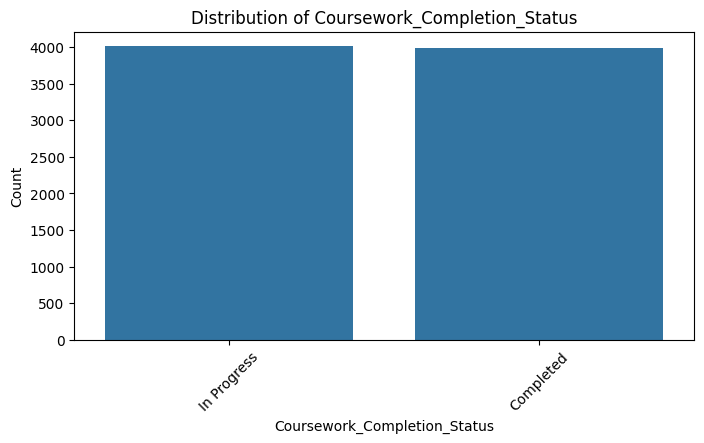

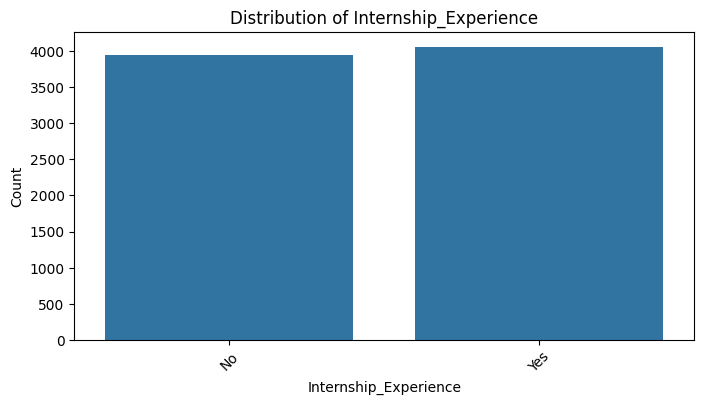

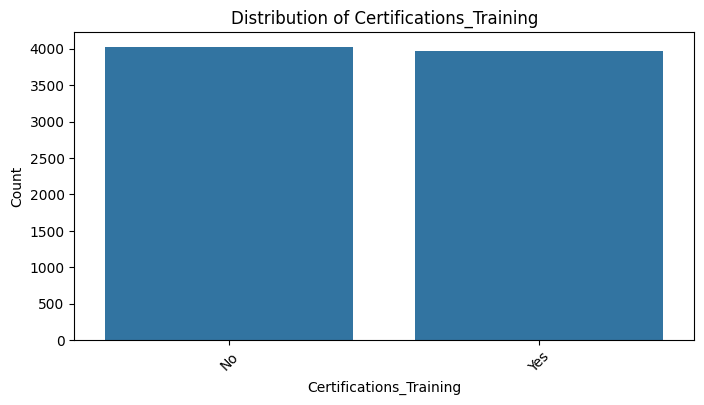

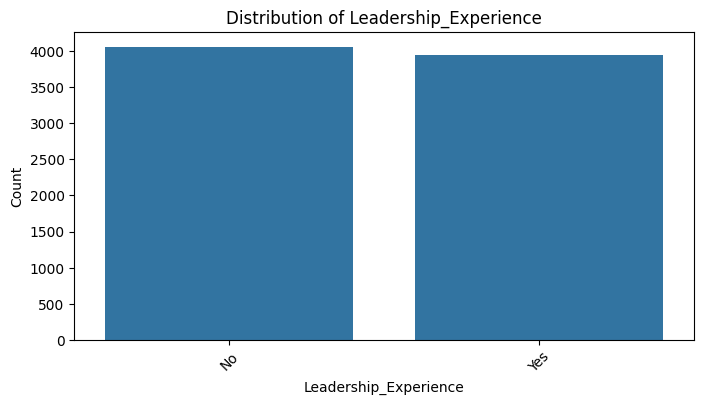

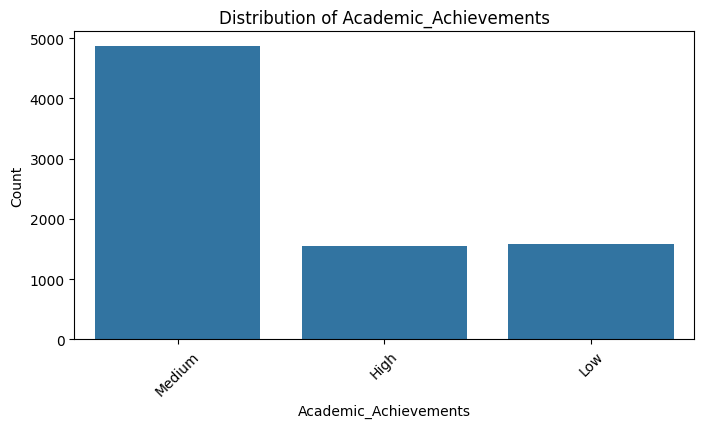

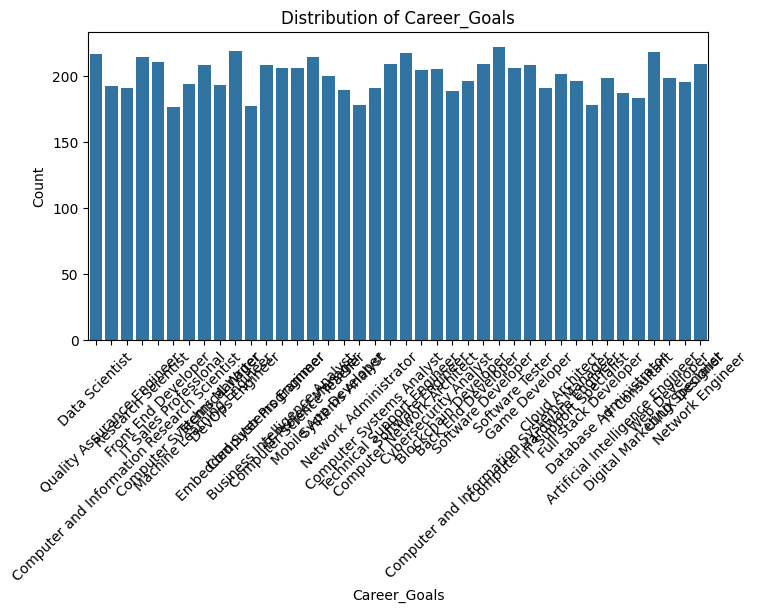

In [9]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

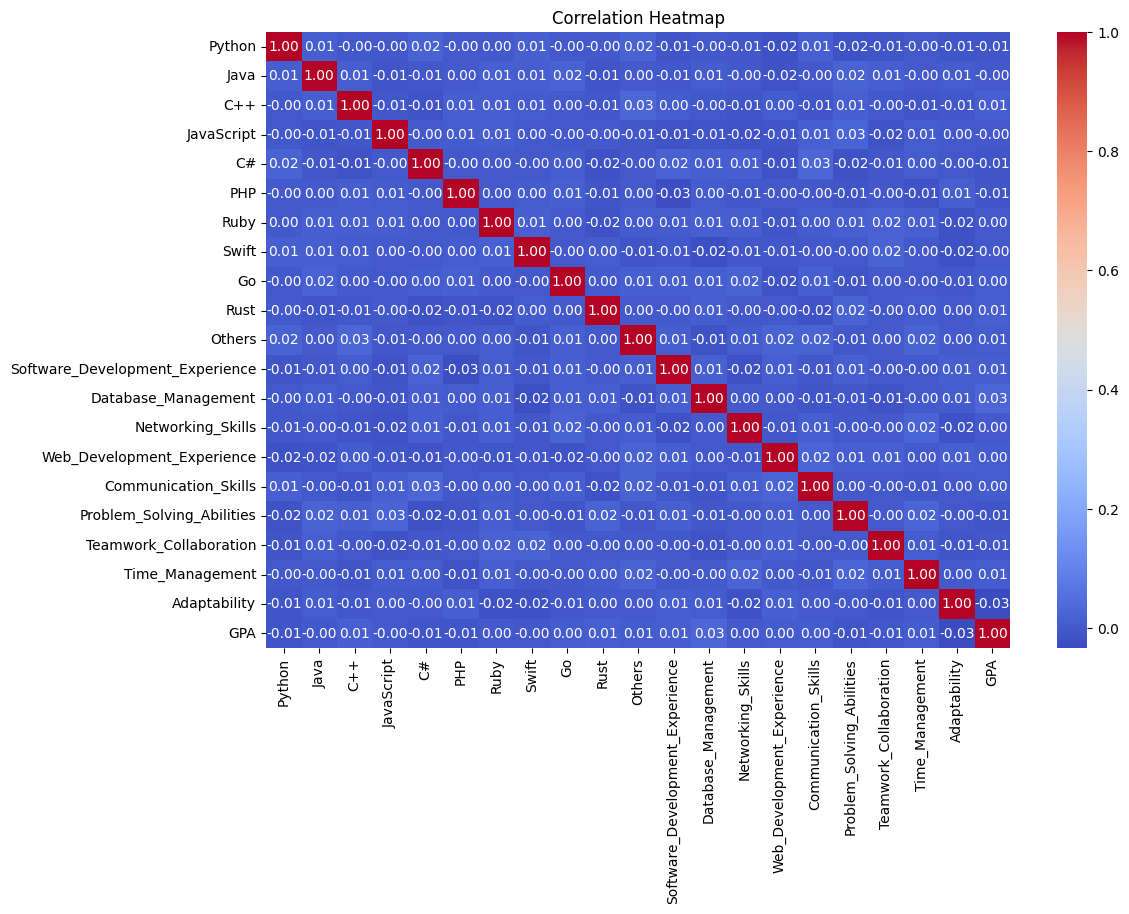

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# -------------------- Data Preprocessing --------------------
label_encoder = LabelEncoder()
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

X = df_encoded.drop(columns=['Career_Goals', 'Personal_Interests', 'Academic_Achievements'])
y = df_encoded['Career_Goals']

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

df_balanced = pd.concat([pd.DataFrame(X_pca), y.reset_index(drop=True)], axis=1)
majority_class = df_balanced['Career_Goals'].value_counts().idxmax()
balanced_df = pd.DataFrame()

for goal in df_balanced['Career_Goals'].unique():
    class_subset = df_balanced[df_balanced['Career_Goals'] == goal]
    balanced_subset = resample(class_subset, replace=True, n_samples=df_balanced['Career_Goals'].value_counts()[majority_class], random_state=42)
    balanced_df = pd.concat([balanced_df, balanced_subset])

X_balanced = balanced_df.drop('Career_Goals', axis=1)
y_balanced = balanced_df['Career_Goals']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [11]:
# -------------------- Model Evaluation Function --------------------
def plot_confusion_matrix(conf_matrix, labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.02      0.02        48
           1       0.06      0.09      0.07        43
           2       0.07      0.04      0.05        49
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        53
           5       0.04      0.04      0.04        46
           6       0.02      0.03      0.02        34
           7       0.04      0.07      0.05        41
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        40
          10       0.04      0.04      0.04        49
          11       0.10      0.11      0.10        46
          12       0.18      0.13      0.15        47
          13       0.03      0.02      0.02        49
          14       0.00      0.00      0.00        51
          15       0.13      0.10      0.11        41
          16       0.07      0.07    

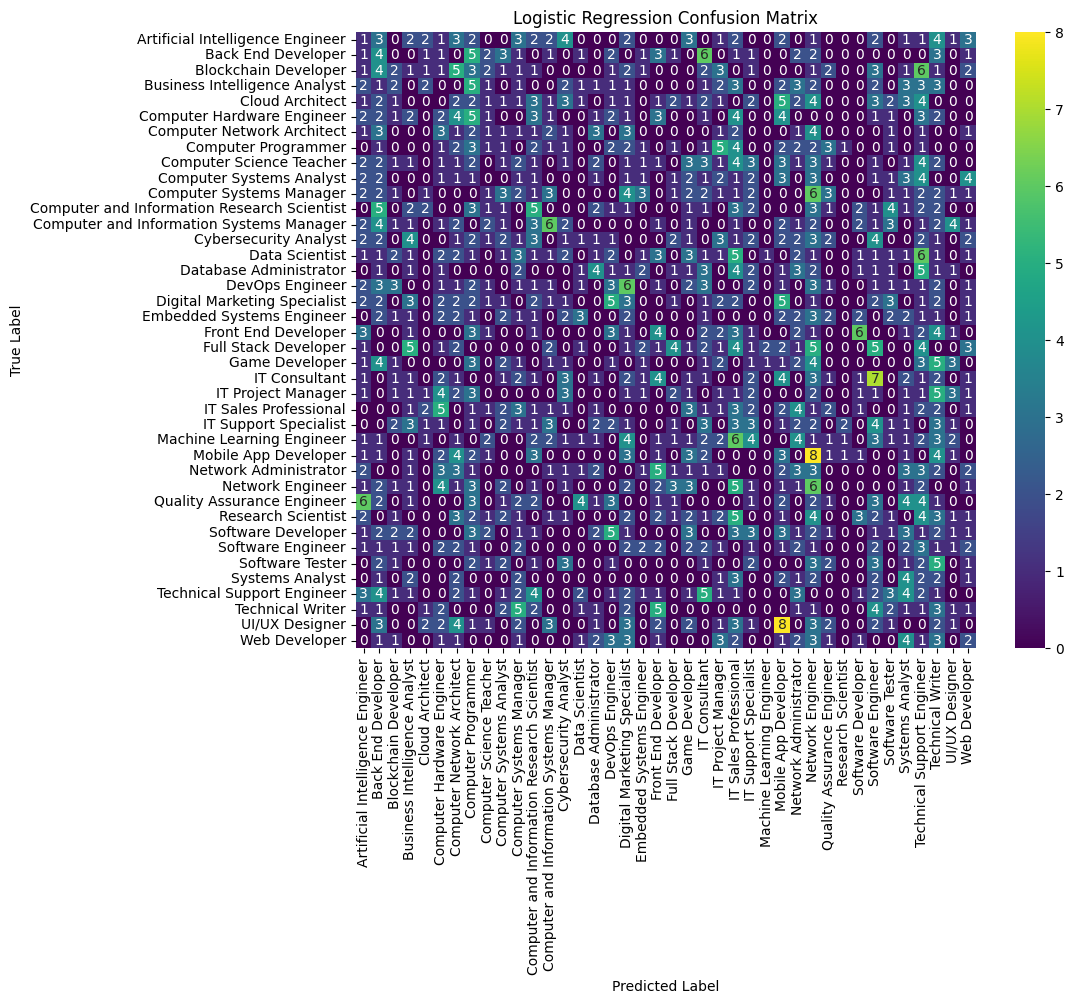

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        48
           1       0.68      0.63      0.65        43
           2       0.77      0.69      0.73        49
           3       0.64      0.52      0.57        44
           4       0.70      0.62      0.66        53
           5       0.60      0.70      0.65        46
           6       0.56      0.59      0.57        34
           7       0.49      0.51      0.50        41
           8       0.62      0.62      0.62        50
           9       0.58      0.62      0.60        40
          10       0.81      0.59      0.68        49
          11       0.55      0.63      0.59        46
          12       0.61      0.53      0.57        47
          13       0.69      0.51      0.59        49
          14       0.61      0.73      0.66        51
          15       0.73      0.59      0.65        41
          16       0.56      0.52      0.54

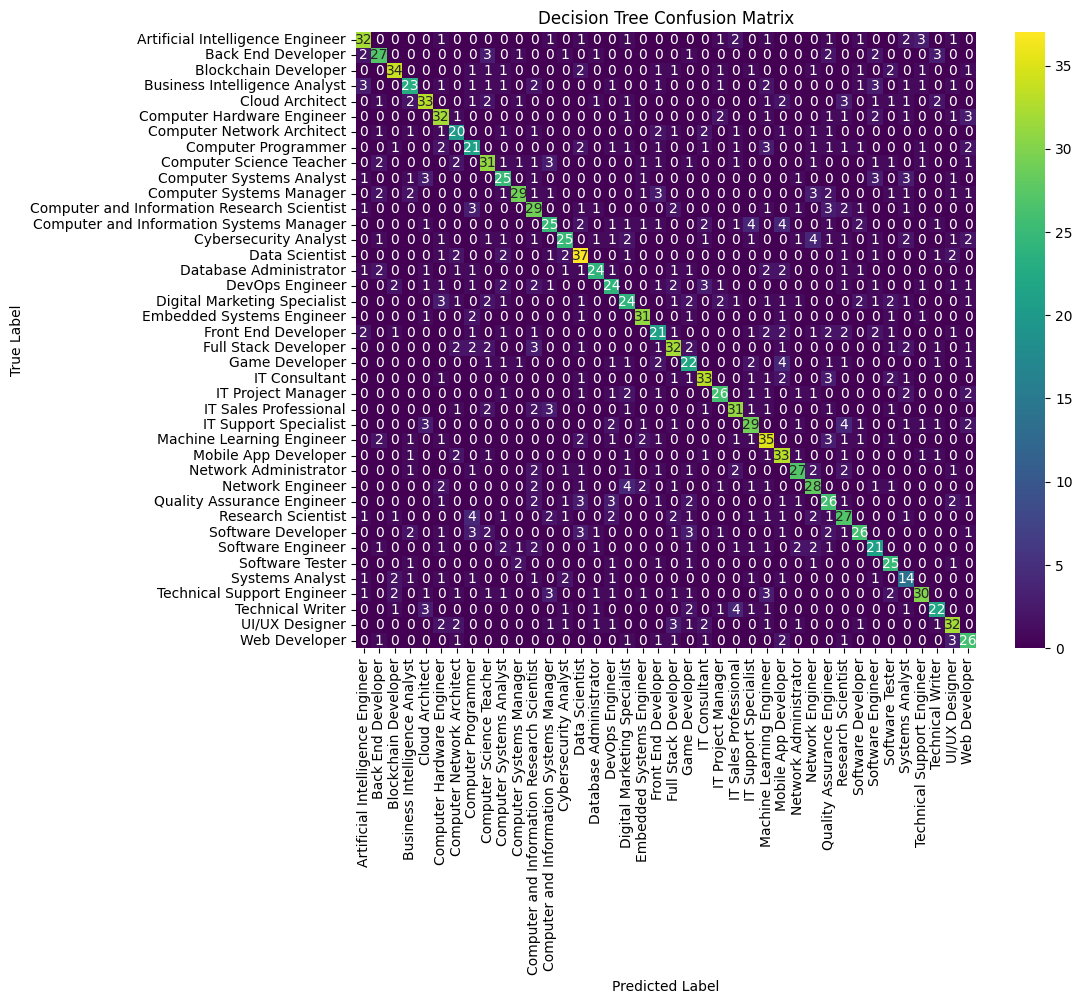

k-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.35      0.26        48
           1       0.26      0.33      0.29        43
           2       0.33      0.41      0.37        49
           3       0.15      0.27      0.19        44
           4       0.32      0.42      0.36        53
           5       0.24      0.35      0.29        46
           6       0.13      0.24      0.16        34
           7       0.15      0.22      0.18        41
           8       0.28      0.30      0.29        50
           9       0.34      0.38      0.36        40
          10       0.27      0.37      0.31        49
          11       0.26      0.30      0.28        46
          12       0.37      0.32      0.34        47
          13       0.24      0.18      0.21        49
          14       0.26      0.22      0.24        51
          15       0.20      0.24      0.22        41
          16       0.22      0.13    

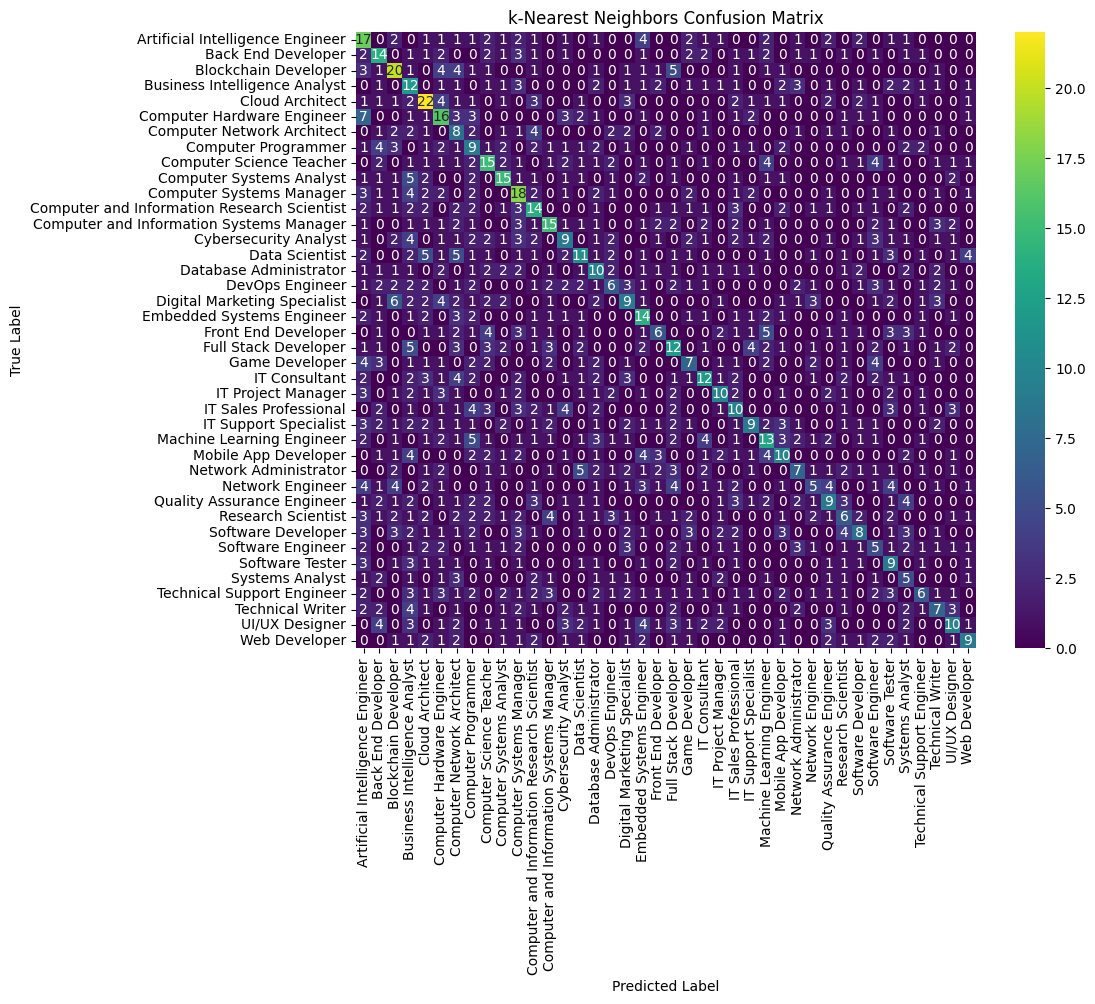

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.08      0.10        48
           1       0.06      0.09      0.07        43
           2       0.15      0.12      0.13        49
           3       0.04      0.05      0.04        44
           4       0.00      0.00      0.00        53
           5       0.07      0.09      0.08        46
           6       0.06      0.06      0.06        34
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        50
           9       0.10      0.10      0.10        40
          10       0.06      0.06      0.06        49
          11       0.13      0.11      0.12        46
          12       0.18      0.15      0.16        47
          13       0.05      0.06      0.06        49
          14       0.05      0.04      0.04        51
          15       0.20      0.15      0.17        41
          16       0.07      0.07      0.07  

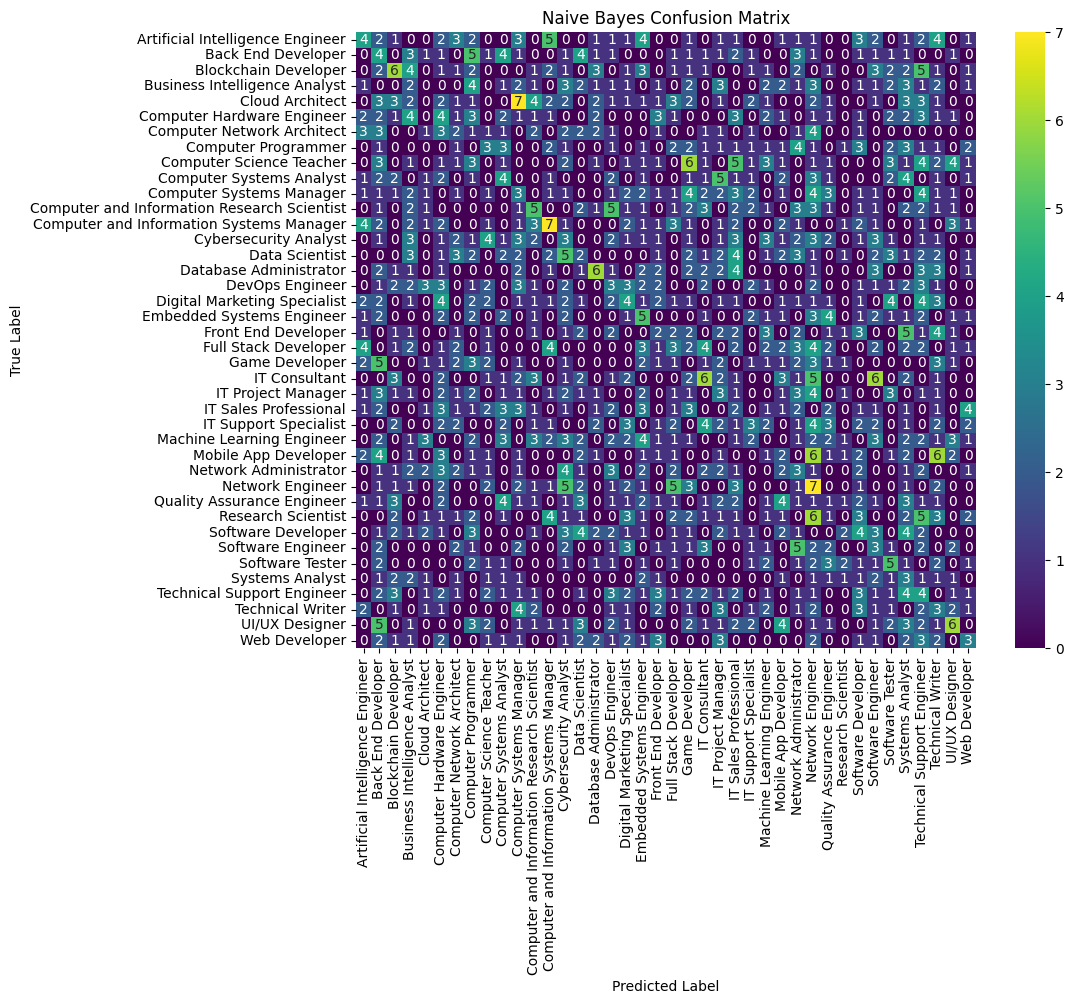

In [12]:
# -------------------- Basic Models --------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_balanced)
    print(f"{name} Classification Report:\n", classification_report(y_test_balanced, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test_balanced, y_pred), labels=label_encoder.classes_, title=f"{name} Confusion Matrix")

In [ ]:
#more on decision tree

In [ ]:
#Code for Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search for Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluate the best model
y_pred_optimized = grid_search.best_estimator_.predict(X_test_balanced)
print("Optimized Decision Tree Classification Report:\n", classification_report(y_test_balanced, y_pred_optimized))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Optimized Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        48
           1       0.68      0.63      0.65        43
           2       0.77      0.69      0.73        49
           3       0.64      0.52      0.57        44
           4       0.70      0.62      0.66        53
           5       0.60      0.70      0.65        46
           6       0.56      0.59      0.57        34
           7       0.49      0.51      0.50        41
           8       0.62      0.62      0.62        50
           9       0.58      0.62      0.60        40
          10       0.81      0.59      0.68        49
          11       0.55      0.63      0.59        46
          12       0.61      0.53      0.57        47
          13       0.69      0.51      0.59        49
          14       0.61      0.73      0.66        51
          15       0.73

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59        48
           1       0.54      0.51      0.52        43
           2       0.66      0.67      0.67        49
           3       0.41      0.55      0.47        44
           4       0.62      0.55      0.58        53
           5       0.56      0.70      0.62        46
           6       0.44      0.50      0.47        34
           7       0.39      0.41      0.40        41
           8       0.76      0.52      0.62        50
           9       0.51      0.62      0.56        40
          10       0.52      0.55      0.53        49
          11       0.72      0.61      0.66        46
          12       0.50      0.49      0.49        47
          13       0.71      0.51      0.60        49
          14       0.71      0.63      0.67        51
          15       0.45      0.54      0.49        41
          16       0.67      0.43      

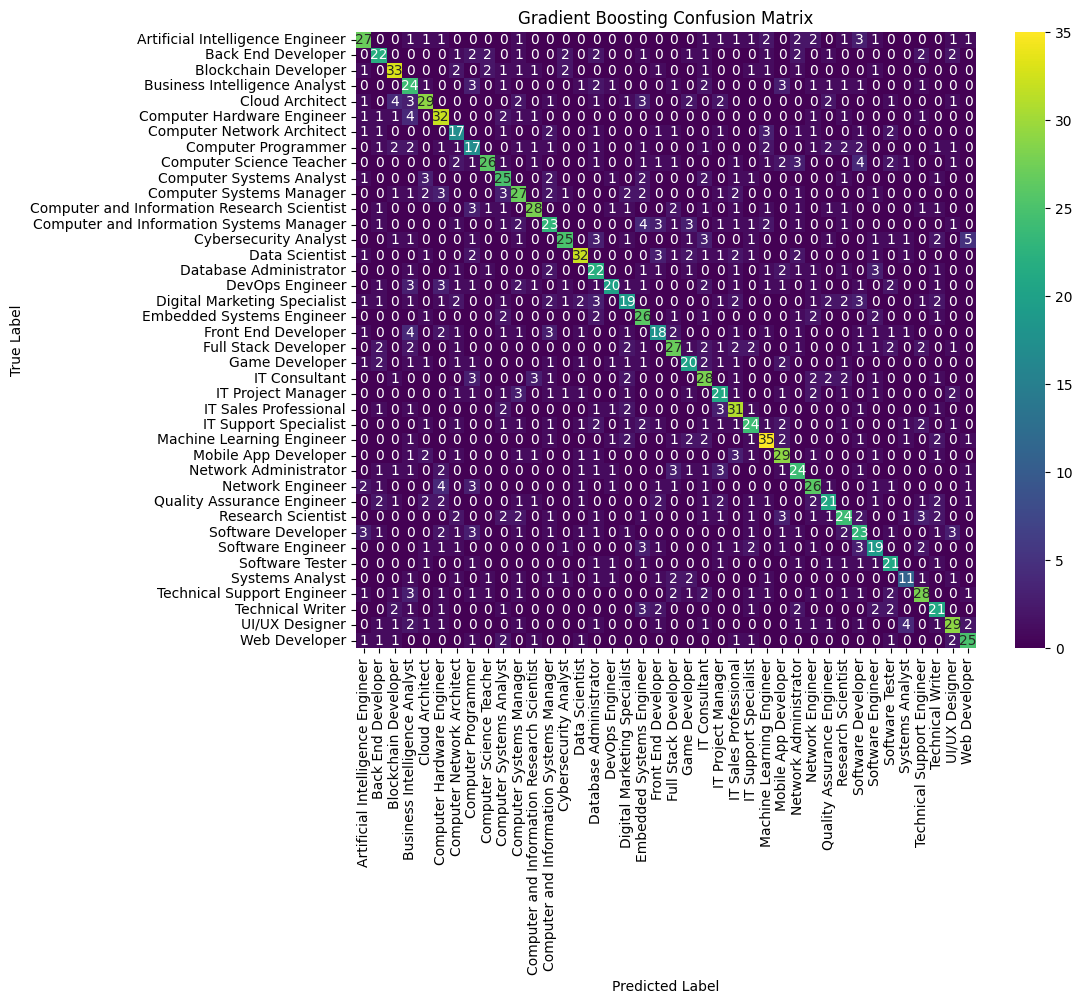

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:09:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69        48
           1       0.61      0.65      0.63        43
           2       0.67      0.69      0.68        49
           3       0.45      0.52      0.48        44
           4       0.69      0.62      0.65        53
           5       0.79      0.72      0.75        46
           6       0.54      0.59      0.56        34
           7       0.51      0.54      0.52        41
           8       0.65      0.62      0.63        50
           9       0.70      0.65      0.68        40
          10       0.64      0.57      0.60        49
          11       0.64      0.63      0.64        46
          12       0.46      0.53      0.50        47
          13       0.60      0.55      0.57        49
          14       0.74      0.73      0.73        51
          15       0.67      0.54      0.59        41
          16       0.48      0.50      0.49      

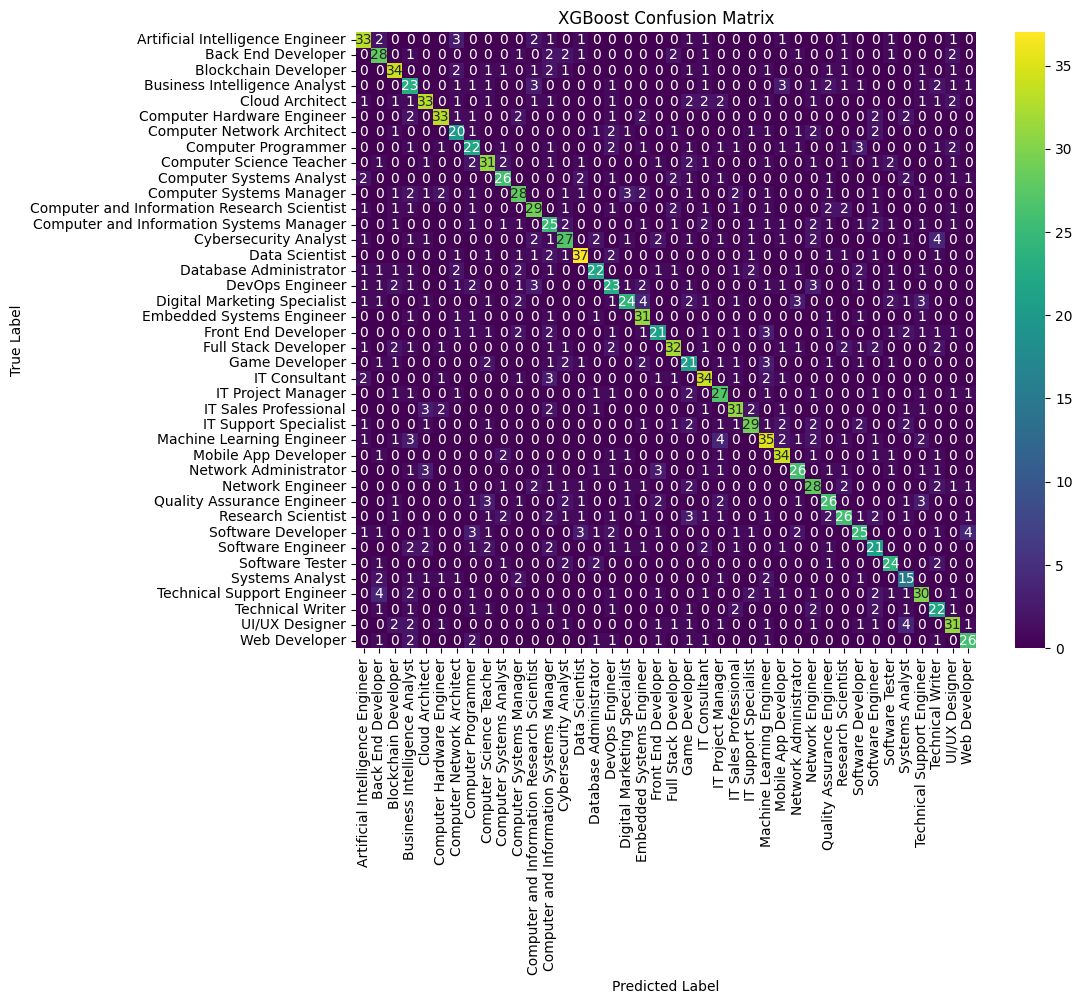

In [15]:
# -------------------- Advanced Models --------------------
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test_balanced)
print("Gradient Boosting Classification Report:\n", classification_report(y_test_balanced, y_pred_gb))
plot_confusion_matrix(confusion_matrix(y_test_balanced, y_pred_gb), labels=label_encoder.classes_, title="Gradient Boosting Confusion Matrix")

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb_model.predict(X_test_balanced)
print("XGBoost Classification Report:\n", classification_report(y_test_balanced, y_pred_xgb))
plot_confusion_matrix(confusion_matrix(y_test_balanced, y_pred_xgb), labels=label_encoder.classes_, title="XGBoost Confusion Matrix")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluate the best Gradient Boosting model
y_pred_gb_optimized = gb_grid_search.best_estimator_.predict(X_test_balanced)
print("Optimized Gradient Boosting Classification Report:\n", classification_report(y_test_balanced, y_pred_gb_optimized))
plot_confusion_matrix(confusion_matrix(y_test_balanced, y_pred_gb_optimized), labels=label_encoder.classes_, title="Optimized Gradient Boosting Confusion Matrix")


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [ ]:
from xgboost import XGBClassifier

# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Grid search for XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluate the best XGBoost model
y_pred_xgb_optimized = xgb_grid_search.best_estimator_.predict(X_test_balanced)
print("Optimized XGBoost Classification Report:\n", classification_report(y_test_balanced, y_pred_xgb_optimized))
plot_confusion_matrix(confusion_matrix(y_test_balanced, y_pred_xgb_optimized), labels=label_encoder.classes_, title="Optimized XGBoost Confusion Matrix")